In [2]:
import sys

!{sys.executable} -m pip install --upgrade pip 
!{sys.executable} -m pip install watermark

try:
    from SPARQLWrapper import SPARQLWrapper, JSON
except ImportError:
    !{sys.executable} -m pip install sparqlwrapper
    from SPARQLWrapper import SPARQLWrapper, JSON
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import math
import matplotlib
import matplotlib.ticker as plticker

sns.set_color_codes("pastel")
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
sns.set(font = 'Verdana')

%matplotlib inline

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100) 

sparqlendpoint = SPARQLWrapper("https://nanosafety.rdf.bigcat-bioinformatics.org/sparql")

In [58]:

sparqlquery = '''
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX obo: <http://purl.obolibrary.org/obo/>

select distinct ?materialtype (count(distinct ?ID AS ?Number)) (GROUP_CONCAT(distinct ?materialname;SEPARATOR=", ") AS ?materialnames)  where { 
    ?s a obo:CHEBI_59999; 
    dcterms:identifier ?ID ; 
    dcterms:title ?materialname ; 
    dcterms:type ?materialtype ; 
    dcterms:source ?source.
} 
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["Name","Number"])
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["materialnames"]["value"].split(',')[0],int(result["callret-1"]["value"])]

#df = df.sort_values(by=['Number'],ascending=False)

display(df)


,Name,Number
0,samarium oxide nanoparticle,1
1,Fe2O3 nanoparticle,1
2,zinc oxide nanoparticle NM110,1
3,multi-walled carbon nanotubes,13
4,yttrium oxide nanoparticle,1
5,graphene,2
6,erbium oxide nanoparticle,1
7,titanium dioxide nanoparticle,9
8,cerium oxide nanoparticle,1
9,gadolinium oxide nanoparticle,2


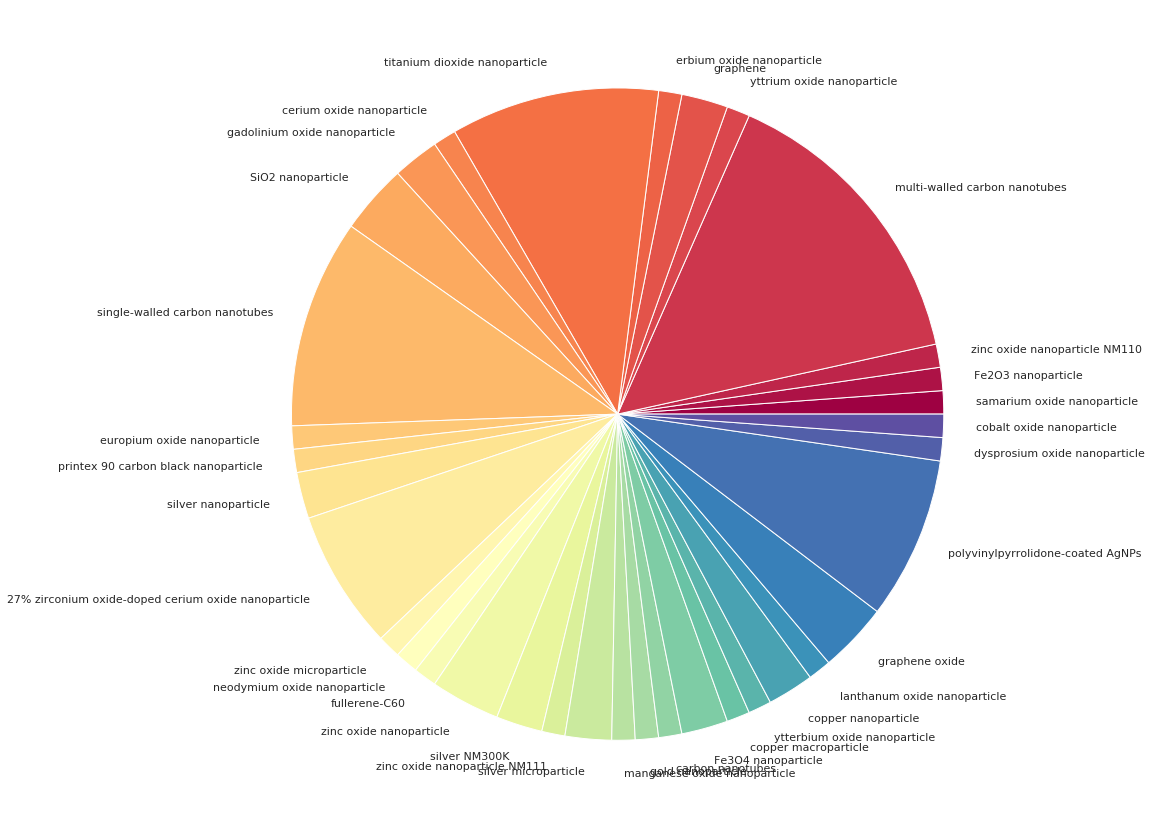

In [68]:
df.plot.pie(y='Number', colormap='Spectral', figsize=(15, 15), legend=False, label = '', labels = df['Name'],title=False) 

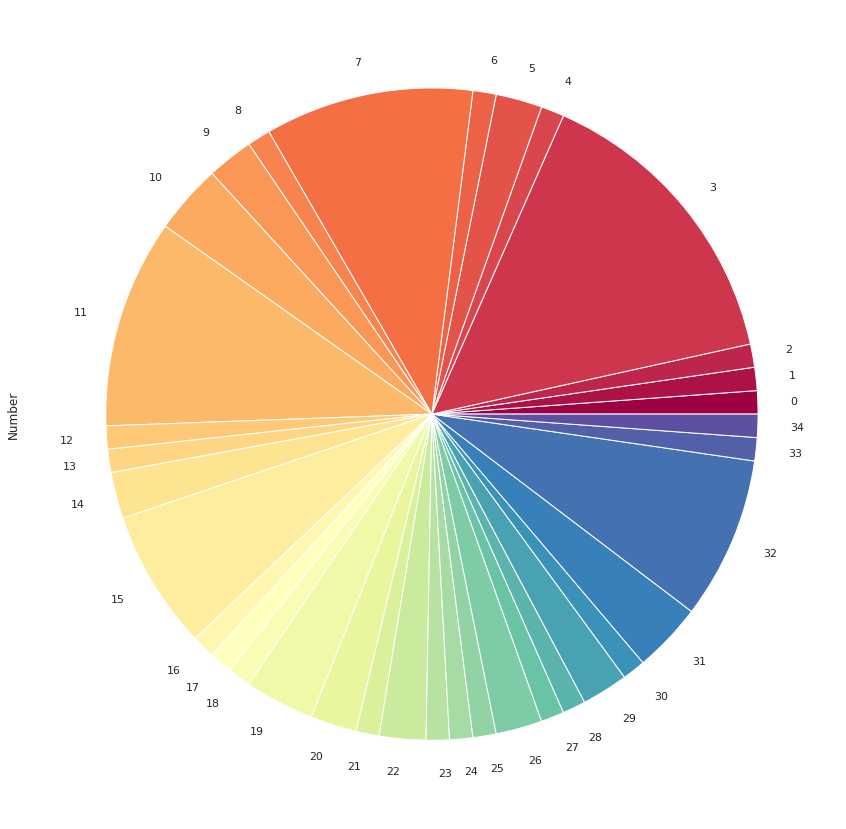

In [65]:

sparqlquery = '''
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX obo: <http://purl.obolibrary.org/obo/>

select distinct ?materialtype (count(distinct ?ID AS ?Number)) (GROUP_CONCAT(distinct ?materialname;SEPARATOR=", ") AS ?materialnames)  where { 
    ?s a obo:CHEBI_59999; 
    dcterms:identifier ?ID ; 
    dcterms:title ?materialname ; 
    dcterms:type ?materialtype ; 
    dcterms:source ?source.
} 
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["Name","Number"])
for result in results["results"]["bindings"]:
    df.loc[len(df.index)] = [result["materialnames"]["value"].split(',')[0],int(result["callret-1"]["value"])]

#df = df.sort_values(by=['Number'],ascending=False)

display(df)

In [70]:
sparqlquery = '''
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX aopo: <http://aopkb.org/aop_ontology#>
PREFIX sio: <http://semanticscience.org/resource/>
PREFIX ncbitaxon: <http://purl.bioontology.org/ontology/NCBITAXON/>
PREFIX ss: <http://semanticscience.org/resource/>

select distinct ?ID ?label ?value ?unit ?medium where { 
    ?s a obo:CHEBI_59999; 
    dcterms:identifier ?ID ; 
obo:BFO_0000056 ?measurement.
?measurement obo:OBI_0000299 ?endpoint.
   ?endpoint rdfs:label ?label; obo:STATO_0000035 ?value ; ss:has-unit ?unit . 
OPTIONAL {?endpoint <http://purl.enanomapper.net/has-condition> ?condition.
?condition ss:has-value ?medium.}
 } ORDER BY DESC(?ID)
'''
sparqlendpoint.setQuery(sparqlquery)
sparqlendpoint.setReturnFormat(JSON)  
results = sparqlendpoint.query().convert()

df = pd.DataFrame(columns=["ID","label","value","unit","medium"])
for result in results["results"]["bindings"]:
    try:
        df.loc[len(df.index)] = [result["ID"]["value"],result["label"]["value"],result["value"]["value"],result["unit"]["value"],result["medium"]["value"]]
    except:
        df.loc[len(df.index)] = [result["ID"]["value"],result["label"]["value"],result["value"]["value"],result["unit"]["value"],'']

#df = df.sort_values(by=['Number'],ascending=False)

display(df)


,ID,label,value,unit,medium
0,https://nanocommons.github.io/identifiers/registry#ERM00000324,hydrodynamic diameter,161.08 +/- 0.81,http://purl.obolibrary.org/obo/UO_0000018,water
1,https://nanocommons.github.io/identifiers/registry#ERM00000324,zeta potential,-14.9 +/- 1.02,http://purl.obolibrary.org/obo/UO_0000247,water
2,https://nanocommons.github.io/identifiers/registry#ERM00000324,hydrodynamic diameter,165.93 +/- 0.54,http://purl.obolibrary.org/obo/UO_0000018,1640 with 10% FBS
3,https://nanocommons.github.io/identifiers/registry#ERM00000324,zeta potential,-4.95 +/- 0.69,http://purl.obolibrary.org/obo/UO_0000247,1640 with 10% FBS
4,https://nanocommons.github.io/identifiers/registry#ERM00000324,zeta potential,-6.78 +/- 0.25,http://purl.obolibrary.org/obo/UO_0000247,DMEM with 10% FBS
5,https://nanocommons.github.io/identifiers/registry#ERM00000324,hydrodynamic diameter,162.13 +/- 0.82,http://purl.obolibrary.org/obo/UO_0000018,DMEM with 10% FBS
6,https://nanocommons.github.io/identifiers/registry#ERM00000324,primary size,97.08 +/- 15.94,http://purl.obolibrary.org/obo/UO_0000018,
7,https://nanocommons.github.io/identifiers/registry#ERM00000323,hydrodynamic diameter,128.15 +/- 1.78,http://purl.obolibrary.org/obo/UO_0000018,1640 with 10% FBS
8,https://nanocommons.github.io/identifiers/registry#ERM00000323,zeta potential,-6.2 +/- 0.13,http://purl.obolibrary.org/obo/UO_0000247,DMEM with 10% FBS
9,https://nanocommons.github.io/identifiers/registry#ERM00000323,hydrodynamic diameter,68.75 +/- 1.77,http://purl.obolibrary.org/obo/UO_0000018,water


([<matplotlib.patches.Wedge at 0x7fb7c4b6b080>,
 [Text(0.981007239630953, 0.4976191272365423, 'multi-walled carbon nanotubes'),
  Text(0.33235447433555204, 1.0485897688749108, 'single-walled carbon nanotubes'),
  Text(-0.36999441980314385, 1.0359073941789079, 'titanium dioxide nanoparticle'),
  Text(-0.8757023894697387, 0.6656916140954386, 'polyvinylpyrrolidone-coated AgNPs'),
  Text(-1.0821193353933163, 0.19752909650967274, '27% zirconium oxide-doped cerium oxide nanoparticle'),
  Text(-1.0885451627373115, -0.1583332835546591, 'zinc oxide nanoparticle'),
  Text(-1.029058606395917, -0.3886365713651934, 'graphene oxide'),
  Text(-0.9214544136930454, -0.6007676451720799, 'SiO2 nanoparticle'),
  Text(-0.7985950166927618, -0.7564694305214769, 'copper nanoparticle'),
  Text(-0.6813931699224514, -0.8635411675091312, 'silver NM300K'),
  Text(-0.5499999702695119, -0.9526279613277874, 'Fe3O4 nanoparticle'),
  Text(-0.40715193953216605, -1.0218744042861607, 'silver nanoparticle'),
  Text(-0.2558

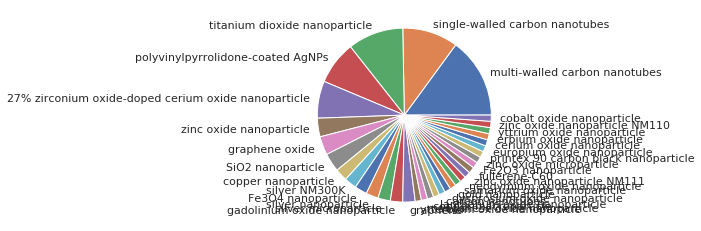

In [52]:
plt.pie(df["Number"],labels=df['Name']) 

In [ ]:
#WPtest